# Loading the Housing dataset into a data frame

In [1]:
import pandas as pd

url="https://raw.githubusercontent.com/scikit-learn/scikit-learn/refs/heads/main/sklearn/datasets/data/boston_house_prices.csv"

df=pd.read_csv(url,skiprows=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Exploratory data analysis (EDA)

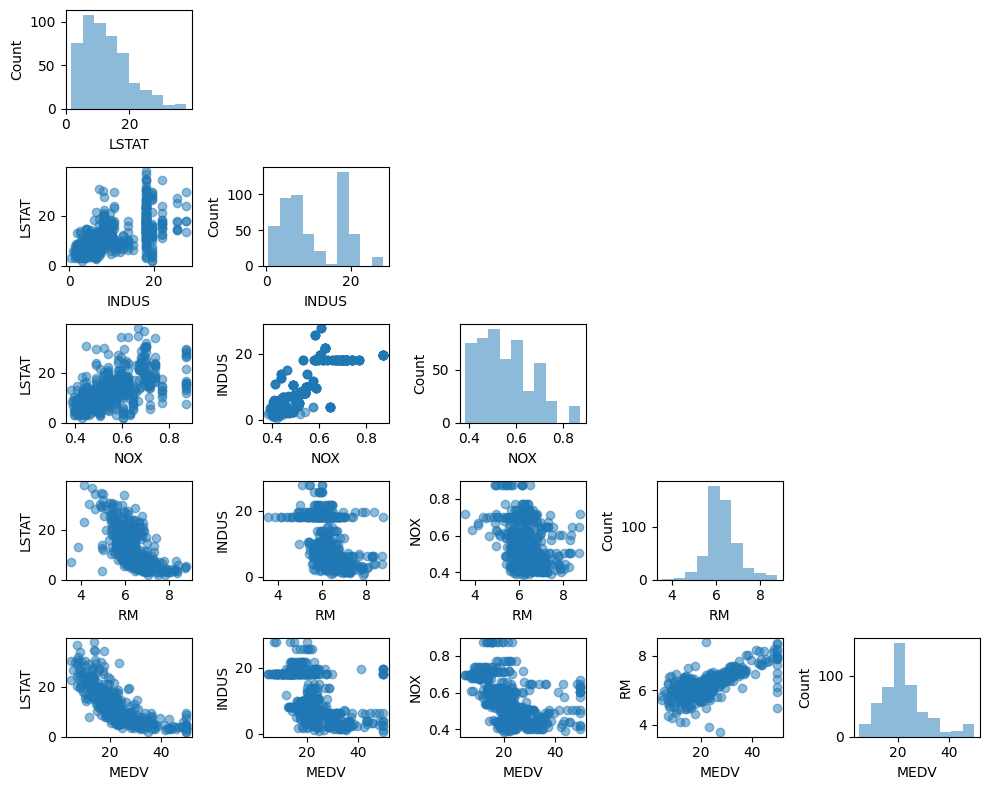

In [2]:
import matplotlib.pyplot as plt

from mlxtend.plotting import scatterplotmatrix
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

scatterplotmatrix(df[cols].values, figsize=(10, 8), names=cols, alpha=0.5)

plt.tight_layout()
plt.show()

we can see that there
is a linear relationship between RM and house prices, MEDV (the fifth column of the
fourth row). Furthermore, we can see in the histogram—the lower-right subplot in
the scatterplot matrix—that the MEDV variable seems to be normally distributed but
contains several outliers

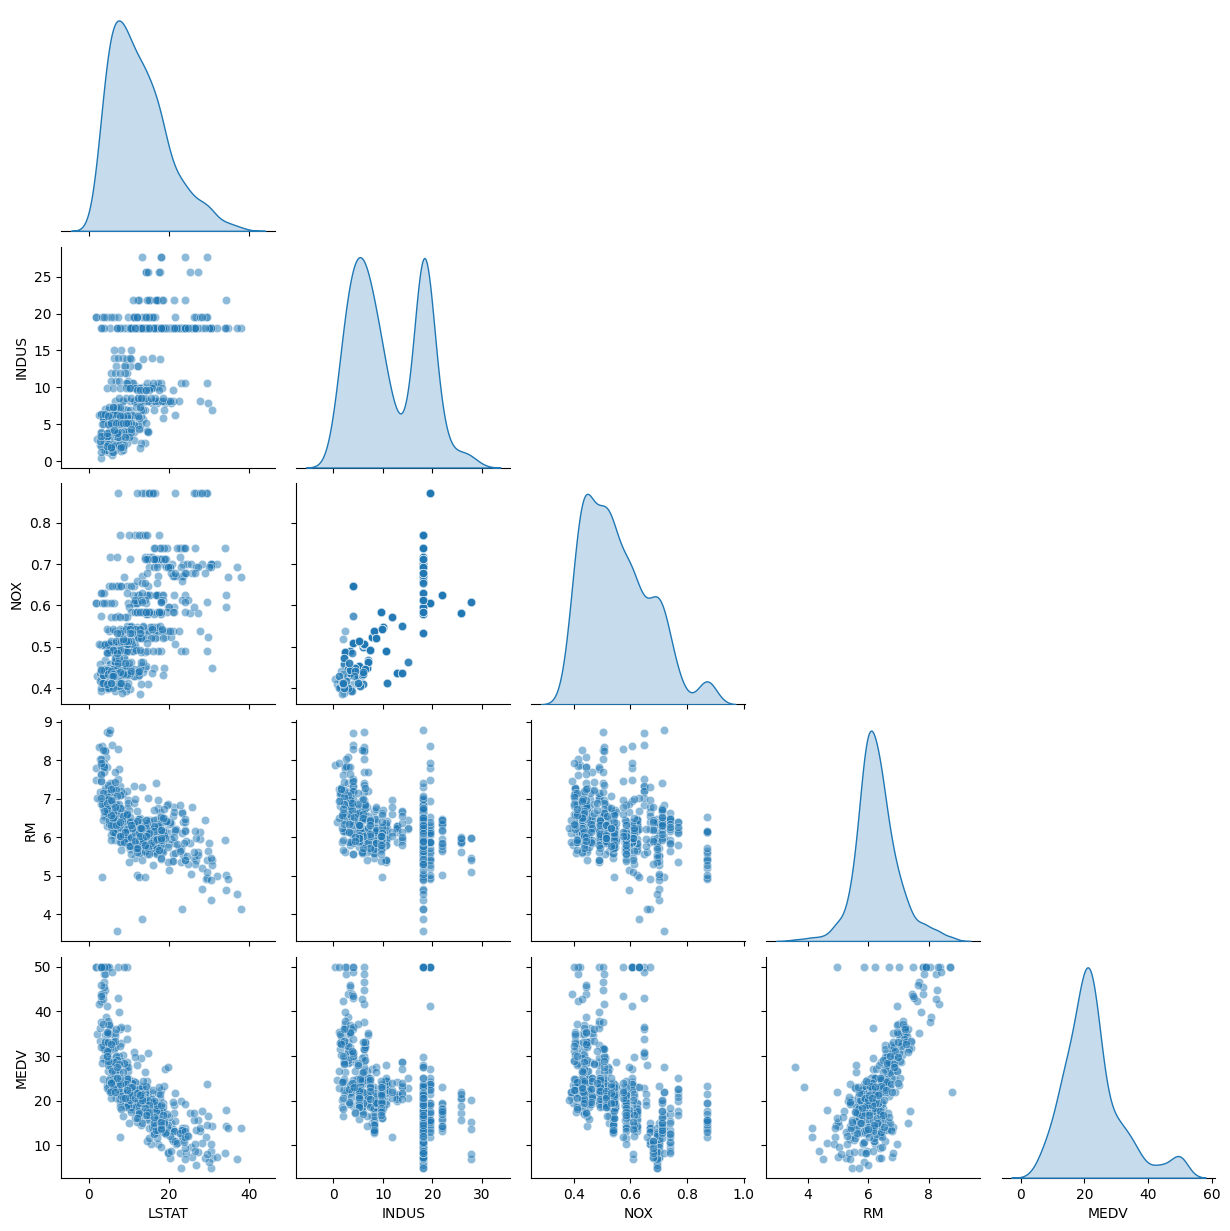

In [3]:
import seaborn as sns


# Assuming df is your DataFrame
sns.pairplot(df[cols], diag_kind='kde', plot_kws={'alpha':0.5}, corner=True)
plt.show()


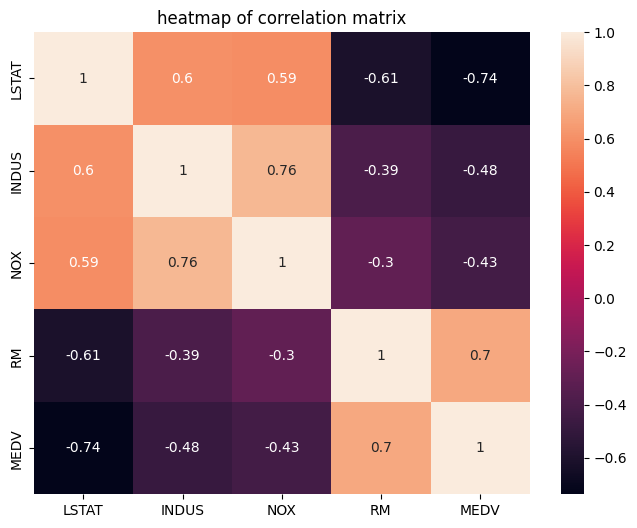

In [6]:
correlation_matrix=df[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title("heatmap of correlation matrix")
plt.show()